# Multilinear Regression - 50 Startups

In [1]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
#load dataset and view it
startup = pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#shape of dataset
startup.shape

(50, 5)

In [4]:
#titles of data
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
#info
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


There as no missing values in the data

In [6]:
#check duplicates
startup[startup.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


There are no duplicate values in the data

In [7]:
#describe
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
#unique
startup['Profit'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

Since the profit values are continuous let's check values_count()

In [9]:
#value_count()
startup['Profit'].value_counts()

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

In [10]:
startup['Profit'].value_counts().sum()

50

all the profit observation are haveing count one and it is unique and there are no duplicate in our data

### Visualization

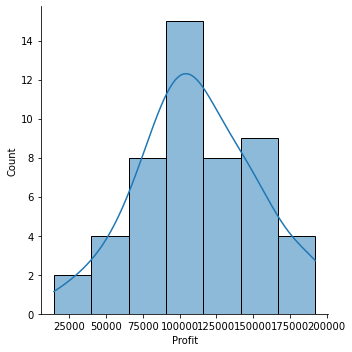

In [11]:
sns.displot(data=startup,x='Profit',kde=True)

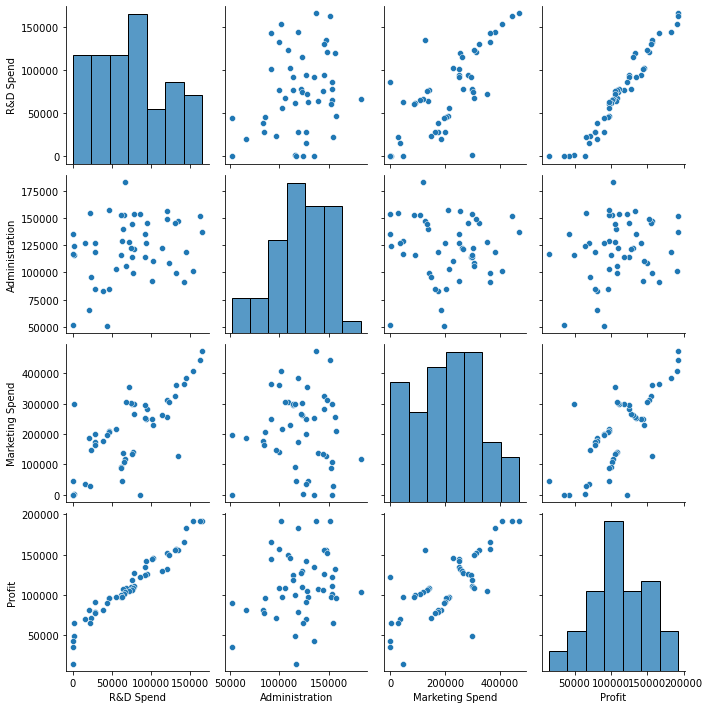

In [12]:
sns.pairplot(startup)

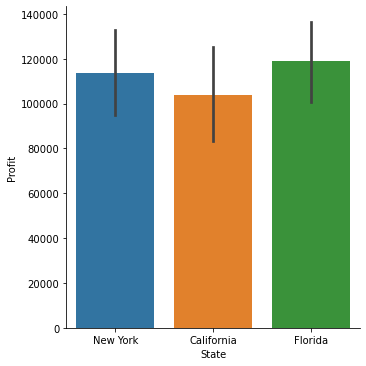

In [13]:
sns.catplot(data=startup, x = 'State',y='Profit',kind="bar")

Since we have state column with 3 categorical data we cannot person correlation unless we seperate them with dummies

In [14]:
#dummies 
startup = pd.get_dummies(startup, columns=['State'])
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [15]:
#Correletion
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

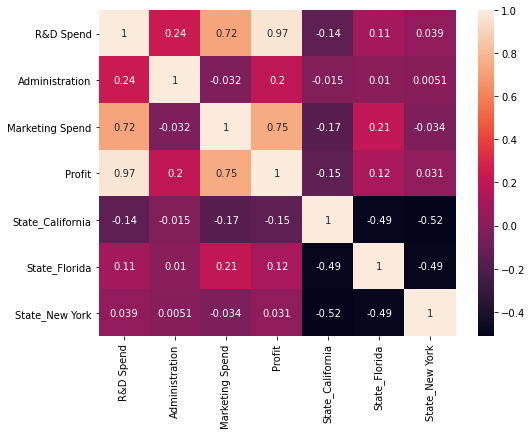

In [16]:
#heatmap

plt.figure(figsize=(8,6))
sns.heatmap(startup.corr(),annot=True)

By observing the figure we can say that there is positive correlation for R&D Spend between Marketing and Profit with 0.72 and 0.97

also there is low correlation between R&D Spend and Administration.

In [17]:
#Renaming the Columns
startup.rename(columns={"R&D Spend":"RD","Marketing Spend":"Marketing","State_California":"S_Cali","State_Florida": "S_flo","State_New York":"S_NY"},inplace=True)
startup.head()

,RD,Administration,Marketing,Profit,S_Cali,S_flo,S_NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


We need to standardize our data by using One Hot encoding technique and change state variable, because the state variable and other variable are different.

In [18]:
#calling Standardsclar
std = StandardScaler()

In [19]:
#fit and transform
startup_std = std.fit_transform(startup)

In [20]:
#creaiting new dataframe for startup_std 
startup_std = pd.DataFrame(startup_std,columns=startup.columns)

In [21]:
startup_std.head()

,RD,Administration,Marketing,Profit,S_Cali,S_flo,S_NY
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


### Linear Regression Model

In [22]:
model = smf.ols('Profit~RD+Administration+Marketing+S_Cali+S_flo+S_NY',data=startup_std).fit()

In [23]:
model.params

Intercept        -5.204170e-16
RD                9.179307e-01
Administration   -1.877136e-02
Marketing         8.185781e-02
S_Cali           -6.031706e-04
S_flo             1.730042e-03
S_NY             -1.100457e-03
dtype: float64

In [24]:
#T value 
print(model.tvalues)

Intercept        -1.555556e-14
RD                1.736858e+01
Administration   -5.170116e-01
Marketing         1.573889e+00
S_Cali           -2.676515e-02
S_flo             7.490466e-02
S_NY             -4.931619e-02
dtype: float64


In [25]:
#P value
print(model.pvalues)

Intercept         1.000000e+00
RD                2.578772e-21
Administration    6.077373e-01
Marketing         1.226769e-01
S_Cali            9.787681e-01
S_flo             9.406301e-01
S_NY              9.608905e-01
dtype: float64


In [26]:
#Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           1.34e-27
Time:                        14:20:22   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD                 0.9179      0.053     17.369      0.000       0.811       1.024
Administration    -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing          0.0819      0.052      1.574      0.123      -0.023       0.187
S_Cali            -0.0006      0.023     -0.027      0.979      -0.046       0.045
S_flo              0.0017      0.023      0.075      0.941      -0.045       0.048
S_NY              -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can see in the table the p value for Administration, State California, State Floridia, State New York is above 0.05 so we ned to check the provit affected to this columns individually 

### Calculating Simple Linear Regression Individually

In [27]:
#Profit And Administration
model_pa = smf.ols('Profit~Administration',data=startup_std).fit()

In [28]:
model_pa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 17 Apr 2021   Prob (F-statistic):              0.162
Time:                        14:20:22   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.141  -3.68e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p value is 0.162 which is more than 0.05 and correlation value is less which is 0.2 so we can conclude that Administration is not that important for calculating Profit prediction.

In [29]:
#Profit and Marketing
model_pm = smf.ols('Profit~Marketing',data=startup_std).fit()

In [30]:
model_pm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           4.38e-10
Time:                        14:20:22   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.096  -5.43e-15      1.000      -0.193       0.193
Marketing      0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we can see the p value is 0 which is less than 0.05 and correlation between then is 0.75 so we can say that Profit is dependent on Marketing Spend. We also need to check the VIF for further clarification.

In [31]:
#Profit and R&D Spend
model_pr  = smf.ols('Profit~RD',data=startup_std).fit()

In [32]:
model_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           3.50e-32
Time:                        14:20:22   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD             0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we can see the p value is 0 whcih is less than 0.05 and correlation is 0.97 so we can conclude that Profit is dependent on R&D Spend.

In [33]:
#Profit and State California
model_sc = smf.ols('Profit~S_Cali',data=startup_std).fit()

In [34]:
model_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Sat, 17 Apr 2021   Prob (F-statistic):              0.312
Time:                        14:20:22   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.143  -3.64e-15      1.000      -0.287       0.287
S_Cali        -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we can see the p value is 0.312 and it is more than 0.05 and the correlation value is -0.15 so we can say that the Profit is not dependent on state califonia variable.

In [35]:
#Profit and State Florida
model_sf = smf.ols('Profit~S_flo',data=startup_std).fit()

In [36]:
model_sf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Sat, 17 Apr 2021   Prob (F-statistic):              0.421
Time:                        14:20:22   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.143  -3.63e-15      1.000      -0.288       0.288
S_flo          0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we can see the p value is 0.421 which is more than 0.05 and correlation is  0.12 so we can say that the profit is not dependent of state florida.

In [37]:
#Profit and State New York
model_sny = smf.ols('Profit~S_NY',data=startup_std).fit()

In [38]:
model_sny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Sat, 17 Apr 2021   Prob (F-statistic):              0.829
Time:                        14:20:22   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.144  -3.61e-15      1.000      -0.290       0.290
S_NY           0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value of NY is 0.829 which is more than 0.05 and the correlation is 0.031 so we can also conclude that Profit is not dependent on State New York variable.

### VIF

Calculating VIF to check Collinearity

In [39]:
startup_std.columns

Index(['RD', 'Administration', 'Marketing', 'Profit', 'S_Cali', 'S_flo',
       'S_NY'],
      dtype='object')

In [40]:
#calculate Rsquared and VIF for RD
rsd_rd = smf.ols('RD~Administration+Marketing+S_Cali+S_flo+S_NY',data=startup_std).fit().rsquared
vif_rd = 1/(1-rsd_rd)

#Print
print(rsd_rd)
print(vif_rd)

0.5992804554110677
2.4955109215494438


In [41]:
#calculate Rsquared and VIF for Administration
rsd_ad = smf.ols('Administration~RD+Marketing+S_Cali+S_flo+S_NY',data=startup_std).fit().rsquared
vif_ad = 1/(1-rsd_ad)

#Print
print(rsd_ad)
print(vif_ad)

0.15093494226942217
1.177766050899384


In [42]:
#calculate Rsquared and VIF for Marketing
rsd_mk = smf.ols('Marketing~RD+Administration+S_Cali+S_flo+S_NY',data=startup_std).fit().rsquared
vif_mk = 1/(1-rsd_mk)

#Print
print(rsd_mk)
print(vif_mk)

0.5862291699815613
2.416796756686394


In [43]:
#calculate Rsquared and VIF for State Califonia
rsd_ca = smf.ols('S_Cali~RD+Administration+Marketing+S_flo+S_NY',data=startup_std).fit().rsquared
vif_ca = 1/(1-rsd_ca)

#Print
print(rsd_ca)
print(vif_ca)

1.0
inf


<ipython-input-43-6e46e3ef6d35>:3: RuntimeWarning: divide by zero encountered in double_scalars
  vif_ca = 1/(1-rsd_ca)


In [44]:
#calculate Rsquared and VIF for State Florida
rsd_fl = smf.ols('S_flo~RD+Administration+Marketing+S_Cali+S_NY',data=startup_std).fit().rsquared
vif_fl = 1/(1-rsd_fl)

#Print
print(rsd_fl)
print(vif_fl)

1.0
inf


<ipython-input-44-1f59795017b9>:3: RuntimeWarning: divide by zero encountered in double_scalars
  vif_fl = 1/(1-rsd_fl)


In [45]:
#calculate Rsquared and VIF for State Florida
rsd_ny = smf.ols('S_NY~RD+Administration+Marketing+S_Cali+S_flo',data=startup_std).fit().rsquared
vif_ny = 1/(1-rsd_ny)

#Print
print(rsd_ny)
print(vif_ny)

1.0
inf


<ipython-input-45-60c8652d4b44>:3: RuntimeWarning: divide by zero encountered in double_scalars
  vif_ny = 1/(1-rsd_ny)


In [46]:
#Creating Data Frame for the above Rsquared and VIF values 

data = {'Feature': ['RD', 'Administration', 'Marketing', 'S_Cali', 'S_flo','S_NY'], 
        'Rsquared':[rsd_rd,rsd_ad,rsd_mk,rsd_ca,rsd_fl,rsd_ny],
       'VIF':[vif_rd,vif_ad,vif_mk,vif_ca,vif_fl,vif_ny]}
rs_vif = pd.DataFrame(data)
rs_vif

,Feature,Rsquared,VIF
0,RD,0.599280,2.495511
1,Administration,0.150935,1.177766
2,Marketing,0.586229,2.416797
3,S_Cali,1.000000,inf
4,S_flo,1.000000,inf
5,S_NY,1.000000,inf


Here we can see that the infinate value for State variable so we can confirm that collinearlity does not exist in them.

##### from the above table of VIF values we can say that States and Administration does not have significient variables for predicting the Profit Values. Hence We can build our model based on R&D Spend and Marketing.

In [47]:
model_prm = smf.ols('Profit~RD+Marketing',data=startup_std).fit()

In [48]:
model_prm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 17 Apr 2021   Prob (F-statistic):           2.16e-31
Time:                        14:22:54   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
RD             0.9072      0.047     19.266      0.000       0.812       1.002
Marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Marketing Rsquared and AIC
print(model_pm.rsquared,"~~~",model_pm.aic)

0.5591535746115515 ~~~ 104.94091802371327


In [54]:
#R&D Spend Rsquared and AIC
print(model_pr.rsquared,"~~~",model_pr.aic)

0.9465353160804392 ~~~ -0.5428445147422991


when we compare both the model in rsquared and aic we can see that Rsquared model is more and AIC is less in R&D spend variable so it is enough to predict the Profit value from R&D Spend.

In [55]:
print(model_pr.rsquared,"~~~",model_pr.rsquared_adj)

0.9465353160804392 ~~~ 0.9454214684987816


### Model Validation

In [56]:
#import module statsmodels.api
import statsmodels.api as sm


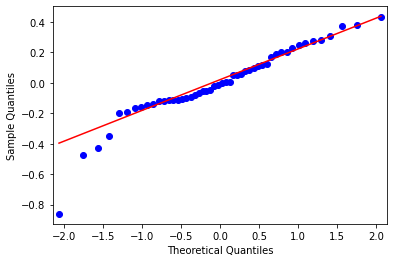

In [57]:
#QQ plot to check normality errors
qqplot = sm.qqplot(model_pr.resid,line='q')
plt.show()

In [58]:
#check the value <= 0.8
list(np.where(model_pr.resid<-0.8))

[array([49], dtype=int64)]

There is one point which is a bit far from the straight line which is 49 observation.

#### Residual and Regressors plot for checking if there is linear relation or not and also ckeck no error varience.

In [61]:
#defing statdard values
def get_std_values(vals):
    return (vals - vals.mean())/vals.std()

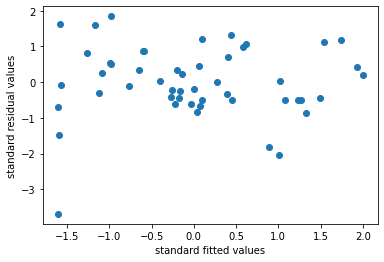

In [62]:
#Residual plot
plt.scatter(get_std_values(model_pr.fittedvalues),get_std_values(model_pr.resid))

plt.xlabel('standard fitted values')
plt.ylabel('standard residual values')
plt.show()

There is no pattern in the residual plot, so we can say there is a linear relation and no error varience

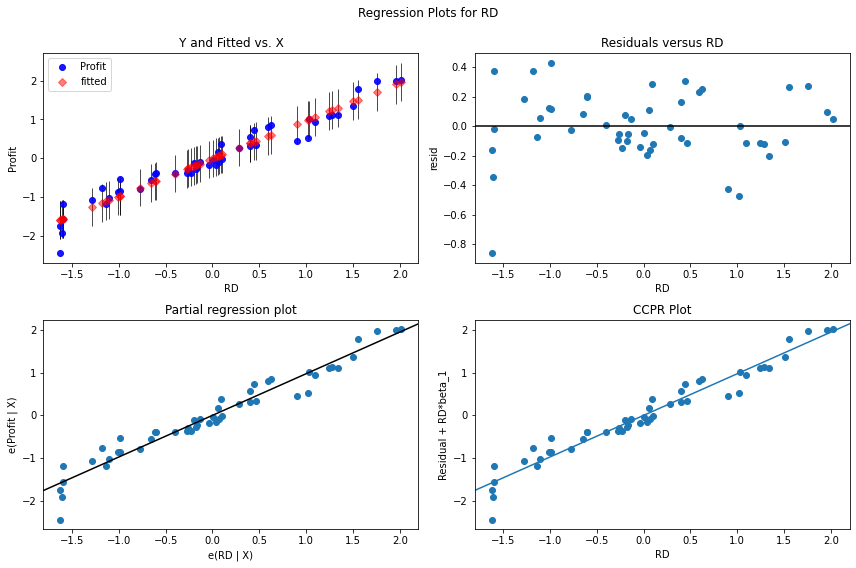

In [63]:
#Regressor Plot
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_pr, "RD", fig=fig)
plt.show()

There is no pattern in the Residual vs R & D Spend plot, so we can say there is a linear relation and no error variance

### Model Detection Diagonstics 

Detecting influencers or outliers using Cook's distance

In [64]:
model_influence =  model_pr.get_influence()
(c, _) = model_influence.cooks_distance

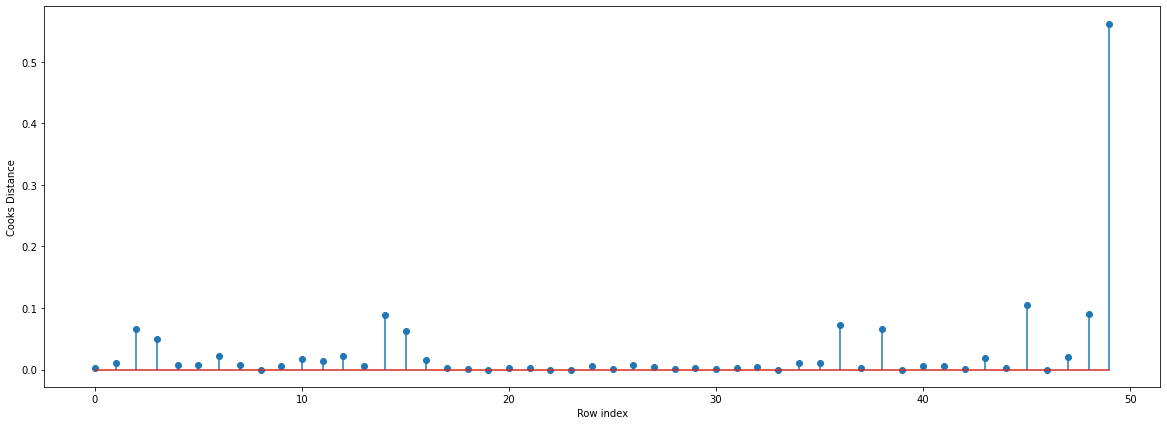

In [66]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(startup_std)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance') 
plt.show()

In [67]:
(np.argmax(c),np.max(c))

(49, 0.562061025926428)

We can see that the 49th observation is an Influencer point and has more distance than other data points. We will delete this data point to further increase our accuracy


In [68]:
#deleting the data point for imporving the model
startup = startup_std.drop(startup_std.index[[49]],axis=0).reset_index()

In [69]:
startup.shape

(49, 8)

In [70]:
startup.head()

,index,RD,Administration,Marketing,Profit,S_Cali,S_flo,S_NY
0,0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


In [71]:
#build model 
final_model = smf.ols('Profit~RD',data=startup).fit()

In [72]:
print(final_model.rsquared,"~~~~~",final_model.rsquared_adj)

0.9573395972488337 ~~~~~ 0.9564319291051918


The adjusted R sqaured value of the model is 0.956. So we can say the accuracy of our model is 95%`

##### Predicting for new data

In [73]:
new_data = pd.DataFrame({'RD':100000},index=[1])

In [74]:
final_model.predict(new_data)

1    94277.81544
dtype: float64

##### For a R&D Spend value of 100000, we will have a Profit of 94277.81544 approx